1. Importing libraries 

In [335]:
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os 

Setting display options

In [336]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data 

In [337]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [338]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [339]:
df = get_data("gurgaon_properties_cleaned_v1")

In [340]:
df.head(1)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ats kocoon,sector 109,1.7,9742.0,1745.0,Super Built up area 1745(162.12 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.),3,3,3,not available,22.0,east,1 to 5 Year Old,"['Jagdish Super Market', 'Dwarka', 'Euro International School', 'Gyaananda School', 'SCR Model School', 'Radha Krishan Mandir', 'ICICI BANK ATM, Annapurna MKT', 'ESIC Dispensary', 'IGIA Airport', 'Canara Bank New Palam Vihar', 'Gurgaon Gramin Bank', 'Daultabad Stadium', 'Bharat Petroleum Shree Shyam Filling', 'The Club, International City', 'Conscient One']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


4. Detailed Analysis

4.1 areaWithType

In [341]:
(df
 .sample(5)[['price','area', 'areaWithType']]
)

,price,area,areaWithType
3163,0.72,1447.0,Super Built up area 1457(135.36 sq.m.)Carpet area: 849 sq.ft. (78.87 sq.m.)
1153,1.54,2364.0,Super Built up area 2364(219.62 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.)
217,2.00,2871.0,Super Built up area 2727(253.35 sq.m.)
3844,1.90,1358.0,Built Up area: 1358 (126.16 sq.m.)
3540,15.00,4500.0,Built Up area: 4500 (418.06 sq.m.)


In [342]:
# function to extract the Super built up area 

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [343]:
# function to extract the built up area or carpet area 

def get_area(text, area_type):
    match = (re
             .search(area_type + r'\s*:\s*(\d+\.?\d*)', 
                     text)
    )
    if match:
        return float(match
                     .group(1))
    return None

In [344]:
# this function checks if the area is in sq.m and converts to square feet if needed 

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value


In [345]:
# extracting super built up area and converting it into sq_ft if needed 

df['super_built_up_area'] = (df
                             .areaWithType
                             .apply(get_super_built_up_area)
)
df['super_built_up_area'] = (df
                             .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                                              x['super_built_up_area']), 
                                                              axis=1)
)

In [346]:
# extracting built up area and converting it if needed 

df['built_up_area'] = (df
                       .areaWithType
                       .apply(lambda x: get_area(x, 'Built Up area')))

df['built_up_area'] = (df
                       .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                              x['built_up_area']), axis = 1))

In [347]:
# extracting carpet area and converting it if needed 

df['carpet_area'] = (df 
                     .areaWithType 
                     .apply(lambda x: get_area(x, "Carpet area")))

df["carpet_area"] = (df
                     .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                                      x['carpet_area']), axis= 1)
                        )

In [348]:
df[['price', 'property type', 'price_per_sq_ft', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']].sample(5)

,price,property type,price_per_sq_ft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
947,5.00,flat,9615.0,5200.0,Built Up area: 5200 (483.1 sq.m.),NaN,5200.00,NaN
860,0.60,house,6173.0,972.0,Plot area 108(90.3 sq.m.),NaN,NaN,NaN
3726,2.10,house,23333.0,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
2128,2.64,flat,11725.0,2252.0,Super Built up area 2251.42(209.16 sq.m.)Built Up area: 1750.75 sq.ft. (162.65 sq.m.),2251.42,1750.75,NaN
2999,1.00,flat,8474.0,1180.0,Carpet area: 1180 (109.63 sq.m.),NaN,NaN,1180.0


In [349]:
(
    df 
    .duplicated() 
    .sum()
)

np.int64(125)

- now there are 125 duplicate rows. 

In [350]:
# checking the rows in which we don't have 'Super built up area', ' Built up area' or 'carpet area' 

df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())].sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
1792,flat,paras dews,sector 106,0.88,6353.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 1120 sq.ft. (104.05 sq.m.)Carpet area: 1040 sq.ft. (96.62 sq.m.),2,2,3+,not available,3.0,south-east,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']","['2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1385.0,1120.0,1040.00
2570,flat,signature andour heights,sector 71,0.59,8428.0,700.0,Super Built up area 700(65.03 sq.m.)Built Up area: 639 sq.ft. (59.37 sq.m.)Carpet area: 540.89 sq.ft. (50.25 sq.m.),2,2,1,not available,6.0,north-east,5 to 10 Year Old,"['Bigbasket SPR 5K DS', 'iON Digital Zone, DPGITM', 'NH8', 'Toll Plaza', 'DPG Institute of Technology and Mgmt', 'ICICI BANK ATM', 'Park Hospital Sohna Rd', 'IGI Airport', 'HDFC Bank, Sec 59', 'Grey Orange (India), NH8', 'Tata Projects Limited Sector 71', 'NIIT, Confluence Building', 'Candor TechSpace, Sec 48', 'TATA Workshop Gurgaon - Zedex Mobility', 'IGL CNG Pump Sec 48']","['1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Curtains', '1 Modular Kitchen', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Fitness Centre / GYM', 'Water softening plant']",700.0,639.0,540.89
222,flat,la vida by tata housing,sector 113,1.32,10344.0,1276.0,Super Built up area 1276(118.54 sq.m.)Built Up area: 1199 sq.ft. (111.39 sq.m.)Carpet area: 1099 sq.ft. (102.1 sq.m.),2,2,2,not available,3.0,north-east,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['2 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1276.0,1199.0,1099.00


In [351]:
df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())].shape

(537, 20)

- there are 537 such rows where we have he all the values of super built up area, built up area and carpet area. 
- out of 3942 records for various flats there are only 537 rows in which we have all the values related to built up area 
- this means that 3405 rows in which atleast one of these values is missing, we will use these 537 rows to fill those values 

In [352]:
# checking the rows in which we have plot area, for these rows the super_built_up_area, built_up_area, carpet_area will be missing 

(
    df[df 
    .areaWithType 
    .str 
    .contains("Plot")][['price', 'property type', 'price_per_sq_ft', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']]
    #.sample(5)
    .shape

)

(749, 8)

- there are 748 rows in which we have plot area. 

In [353]:
# checking for count of missing values in the 'super_built_up_area', 'built_up_area' and 'carpet_area'

df[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    2008
built_up_area          2713
carpet_area            1941
dtype: int64

Out of 3942 rows - 
- super built up area has 2008 missing values
- built up area has 2713 missing values 
- carpet area has 1941 mising values 

In [354]:
# extracting and converting to dataframe for those rows in which 'super_built_up_area', 'built_up_area' and 'carpet_area' is missing 

all_nan_df = (
    df[(df 
    .super_built_up_area 
    .isnull()) & ( 
        df 
        .built_up_area 
        .isnull() & (
            df 
            .carpet_area 
            .isnull()
        )
    )][['price', 'property type', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']] 
    # .sample(3)
    # .shape
)

In [355]:
(
    all_nan_df
    .head()
)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
6,3.40,house,1530.0,Plot area 170(142.14 sq.m.),NaN,NaN,NaN
7,3.05,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
13,14.00,house,3510.0,Plot area 390(326.09 sq.m.),NaN,NaN,NaN
14,9.50,house,546.0,Plot area 546(50.73 sq.m.),NaN,NaN,NaN
15,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN


- super_built_up_area	built_up_area	carpet_area are missing in only those rows where we have the record of the independent houses and for those records we have the plot area 
- our next goal is to extract those plot areas for the independent houses

In [356]:
# storing the index values for the records where the super_built_up_area	built_up_area	carpet_area is missing 

all_nan_df_index = (
    df[(df 
    .super_built_up_area 
    .isnull()) & ( 
        df 
        .built_up_area 
        .isnull() & (
            df 
            .carpet_area 
            .isnull()
        )
    )][['price', 'property type', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']] 
    .index
)

In [357]:
# creating function for extracting the plot area 

def extract_plot_area(area_with_type):
    match = re.search(r"Plot area (\d+\.?\d*)", area_with_type)
    if match : 
        return float(match.group(1))
    else: 
        return None 

In [358]:
# here we are extracting the plot area and putting it into the built up area as for the independent house case the plot area is quite similar to the built up area

all_nan_df['built_up_area'] = (
    all_nan_df
    .areaWithType
    .apply(extract_plot_area)
)

In [359]:
all_nan_df.sample(5)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2137,3.50,house,1620.0,Plot area 180(150.5 sq.m.),NaN,180.0,NaN
2327,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
1144,2.60,house,1080.0,Plot area 120(100.34 sq.m.),NaN,120.0,NaN
637,0.30,house,50.0,Plot area 50(4.65 sq.m.),NaN,50.0,NaN
3288,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN


- here, there is some discrepancy in the plot area as some are in square feet,  square yard and square meter. 
- to fix this issue we need to convert those plot areas who are in square yards and square meter to square feets
- we will use the following formula 
    - square feet = 9 * square yard 
    - square feet = 10.7 * square meter 

In [360]:
# scale conversion formula function 

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else: 
        if round(row['area']/ row['built_up_area']) == 9.0: 
            return row['built_up_area'] * 9 
        elif round(row['area']/row['built_up_area']) == 11.0: 
            return row['built_up_area'] * 10.7 
        else: 
            return row['built_up_area']

In [361]:
all_nan_df.loc[2487][['price',	'property type',	'area',	'areaWithType',	'super_built_up_area',	'built_up_area',	'carpet_area']]

price                                       0.75
property type                              house
area                                       100.0
areaWithType           Plot area 100(9.29 sq.m.)
super_built_up_area                          NaN
built_up_area                              100.0
carpet_area                                  NaN
Name: 2487, dtype: object

In [362]:
# converting the scale 

all_nan_df['built_up_area'] = (
    all_nan_df 
    .apply(convert_scale, axis = 1)
)

In [363]:
all_nan_df.sample(5)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
982,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
1170,1.30,house,552.0,Plot area 56.6(47.32 sq.m.),NaN,56.6,NaN
1354,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.0,NaN
3525,7.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
1691,1.20,house,538.0,Plot area 50,NaN,535.0,NaN


In [364]:
# updating the original dataframe with these values 

df.update(all_nan_df)

In [365]:
df[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    2008
built_up_area          2113
carpet_area            1941
dtype: int64

- by using the above operations we significantly reduced the number of missing values in the built up area. 
- earlier the missing values in the built up area was around 2713 which has now reduced to 2113. 

In [366]:
# current state of our dataframe

df.head()

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,ats kocoon,sector 109,1.70,9742.0,1745.0,Super Built up area 1745(162.12 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.),3,3,3,not available,22.0,east,1 to 5 Year Old,"['Jagdish Super Market', 'Dwarka', 'Euro International School', 'Gyaananda School', 'SCR Model School', 'Radha Krishan Mandir', 'ICICI BANK ATM, Annapurna MKT', 'ESIC Dispensary', 'IGIA Airport', 'Canara Bank New Palam Vihar', 'Gurgaon Gramin Bank', 'Daultabad Stadium', 'Bharat Petroleum Shree Shyam Filling', 'The Club, International City', 'Conscient One']","['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1745.0,1550.0,NaN
1,house,independent,sector 36,0.66,7168.0,921.0,Built Up area: 823 (76.46 sq.m.),2,2,3,not available,4.0,NaN,0 to 1 Year Old,NaN,NaN,NaN,NaN,823.0,NaN
2,flat,gls arawali homes,sector 163,0.28,4938.0,567.0,Super Built up area 567(52.68 sq.m.)Built Up area: 500 sq.ft. (46.45 sq.m.)Carpet area: 467 sq.ft. (43.39 sq.m.),2,2,2,not available,3.0,east,1 to 5 Year Old,"['Huda City Centre', 'Golf Course Road', 'Delhi-Mumbai Expressway', 'KMP Expressway', 'Rajiv Chowk', 'IGI Airport']","['3 Fan', '1 Exhaust Fan', '4 Light', '2 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park']",567.0,500.0,467.0
3,flat,breez global heights,sector 36,0.24,5825.0,412.0,Carpet area: 412 (38.28 sq.m.),1,1,1,not available,8.0,na,0 to 1 Year Old,"['S.R.S. Hospital and Critical Care Unit', 'Shri Balaji Hospital and Trauma Center', 'Chandna Dental Surgery Orthodontic and Implant Centre', 'The Muskan Dental Clinic', 'Dental Xpert Dental Clinic', 'Ayushman Hospital And Trauma Centre', 'Yadav Hospital Gurgoan', 'Kamla Hospital Gurgaon', 'Harshila Dental Clinic', 'Clove Dental', 'Vaishnavi Nursing Home', 'Petrol Pump IBP', 'Petrol Pump Indian Oil', 'Boxer Fuel Point', 'Haldiram']","['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '5 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']",NaN,NaN,412.0
4,house,rwa sector 46,sector 46,4.50,24390.0,1845.0,Plot area 204(170.57 sq.m.)Built Up area: 206 sq.yards (172.24 sq.m.)Carpet area: 205 sq.yards (171.41 sq.m.),6,6,3+,store room,3.0,North-East,5 to 10 Year Old,"['Axis bank ATM', 'State bank of india ATM', 'Icici bank ATM', 'Icici ATM', 'Standard chartered ATM', 'Hdfc bank ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Dispencery', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Medanta', 'Meher Clinic', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Neelkanth Health Care', 'Shivam Hospital Gurgaon', 'Samvit Health Care', 'Pernod Ricard Charitable Dispensary', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharma

4.2 additional rooms

In [367]:
(
    df 
    .additionalRoom
    .value_counts()
)

additionalRoom
not available                                    1681
servant room                                      709
study room                                        251
others                                            236
pooja room                                        170
store room                                        107
study room,servant room                           100
pooja room,servant room                            83
pooja room,study room,servant room,store room      71
servant room,others                                59
pooja room,study room,servant room                 57
pooja room,study room,servant room,others          56
servant room,pooja room                            38
servant room,store room                            34
study room,others                                  30
pooja room,study room                              24
pooja room,others                                  17
pooja room,store room                              17
servant room,

- since there are multiple combinations of the extra rooms available but broadly these rooms are divided into 5 categories
    - servent room 
    - pooja room 
    - others 
    - store room 
    - study room 
- now we will create 5 extra rooms based on these columns which is a kind of one hot encoding for thesee values 

In [368]:
# list of new cols to be created 
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# populating the new col based on the list 
for col in new_cols: 
    df[col] = (
        df['additionalRoom']
        .str 
        .contains(col) 
        .astype(int)
    )


In [369]:
(
    df 
    .sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]
)

,additionalRoom,study room,servant room,store room,pooja room,others
2761,not available,0,0,0,0,0
3430,not available,0,0,0,0,0
883,study room,1,0,0,0,0
30,not available,0,0,0,0,0
2294,not available,0,0,0,0,0


4.4 agePossession 

In [370]:
( 
    df 
    .agePossession
    .value_counts()
)

agePossession
1 to 5 Year Old       1702
5 to 10 Year Old       604
0 to 1 Year Old        550
undefined              358
10+ Year Old           345
Under Construction      92
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Aug 2024                 5
Nov 2023                 5
Jul 2024                 4
Sep 2023                 4
Jan 2025                 4
Oct 2023                 4
By 2025                  4
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Jun 2027                 2
Mar 2025                 2
Jul 2027                 2
Oct 2025                 2
Jan 2026                 2
Dec 2026                 2
Jul 2025                 2
Sep 2025                 2
Apr 2026      

In [371]:
def cateorize_age_possession(value):

    categories = {
        "New Property": ["0 to 1 Year Old", "Within 6 months", "Within 3 months"],
        "Relatively New": ["1 to 5 Year Old"],
        "Moderately Old": ["5 to 10 Year Old"],
        "Old Property": ["10+ Year Old"],
        "Under Construction": ["Under Construction", "By"]}
    
    if pd.isna(value):
        return 'undefined'

    for category, keywords in categories.items(): 
        if any(keyword in value for keyword in keywords):
            return category
    
    try: 
        if int(value.split(" ")[-1]):
            return "Under Construction" 
    except ValueError: 
        pass 
 
    return "undefined"
        

In [372]:
df['agePossession'] = (
    df 
    .agePossession 
    .apply(cateorize_age_possession)
)

In [373]:
(
    df 
    .agePossession 
    .value_counts()
)

agePossession
Relatively New        1702
New Property           646
Moderately Old         604
undefined              359
Old Property           345
Under Construction     286
Name: count, dtype: int64

- the number of columns in the agePossession category has significantly reduced now. 
- it's reduced to 5 categories 

4.5 furnish details 

In [374]:
(
    df[['furnishDetails','features']]
    .sample(5)
)

,furnishDetails,features
933,NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3133,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2686,"['2 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2440,"['4 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '8 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
519,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


In [375]:

all_furnishings = []
for details in df['furnishDetails'].dropna():
    furnishings= (details.replace("[", '').replace(']', '').replace("'", "").split(","))
    all_furnishings.extend(furnishings)

In [376]:
unique_furnishings = list(set(all_furnishings))

In [377]:
for furnishing in unique_furnishings[:5]: 
    print(furnishing)


 No Curtains
 75 Light
 62 Light
 18 Chimney


In [378]:
columns_to_include = []

for furnishing in unique_furnishings:
    columns_to_include.append(re.sub(r"No |\d+", "", furnishing).strip())
    

In [379]:
columns_to_include = list(set(columns_to_include))

In [380]:
columns_to_include = [i for i in columns_to_include if i]

In [381]:
columns_to_include

['Washing Machine',
 'Wardrobe',
 'Fridge',
 'Geyser',
 'Modular Kitchen',
 'Chimney',
 'Microwave',
 'AC',
 'Sofa',
 'Fan',
 'Bed',
 'Stove',
 'Water Purifier',
 'Light',
 'Exhaust Fan',
 'TV',
 'Dining Table',
 'Curtains']

In [382]:
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details: 
            return 0 
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match: 
            return int(match.group(1))
        elif furnishing in details: 
            return 1 
    return 0 

In [383]:
for furnishing in columns_to_include:
    df[furnishing] = df.furnishDetails.apply(lambda x: get_furnishing_count(x, furnishing))

In [384]:
# creating a new dataframe with required columns 

furnish_df = df[['furnishDetails'] + columns_to_include]

In [385]:
furnish_df.sample(5)

,furnishDetails,Washing Machine,Wardrobe,Fridge,Geyser,Modular Kitchen,Chimney,Microwave,AC,Sofa,Fan,Bed,Stove,Water Purifier,Light,Exhaust Fan,TV,Dining Table,Curtains
2858,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1531,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1167,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
2610,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3908,"['7 Wardrobe', '17 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,7,0,0,1,0,0,5,0,0,0,0,0,17,0,0,0,0


In [386]:
furnish_df.drop(columns= ['furnishDetails'], inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_5855/65960383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnish_df.drop(columns= ['furnishDetails'], inplace= True)


In [387]:
furnish_df.sample(5)

,Washing Machine,Wardrobe,Fridge,Geyser,Modular Kitchen,Chimney,Microwave,AC,Sofa,Fan,Bed,Stove,Water Purifier,Light,Exhaust Fan,TV,Dining Table,Curtains
2638,0,4,0,4,1,1,0,0,0,7,0,0,0,22,1,0,0,0
113,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- now for every flat we have feature details which are available on that flat 
- based on this we will try to categorise the columns that are furnished, semi furnished and unfurnished
- we will use clustering algorith to categorize this. 

In [388]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [389]:
# scaling the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnish_df)

In [390]:
wcss_reduced = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

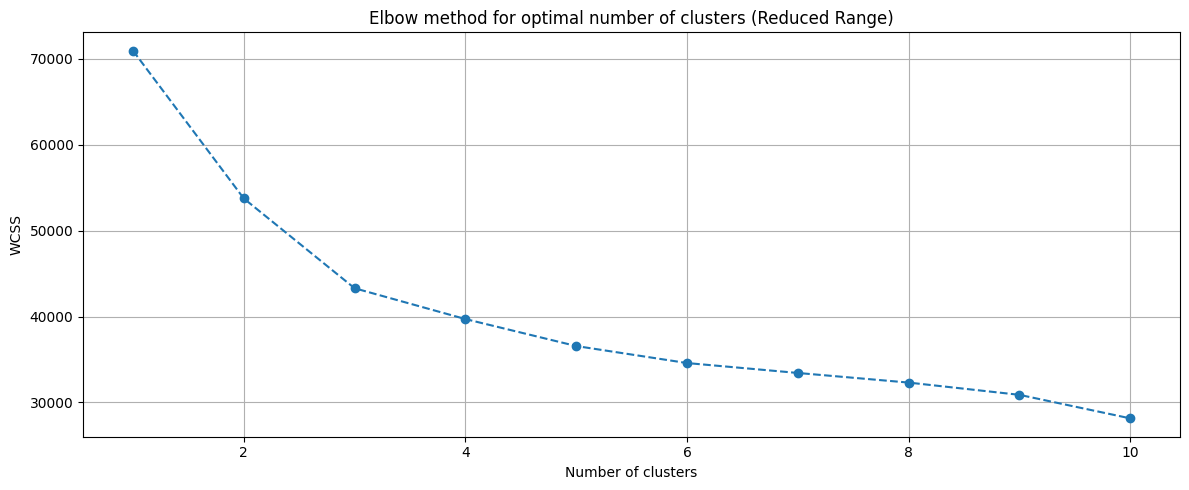

In [391]:
# plotting the results 

plt.figure(figsize= (12, 5))
plt.plot(range(1, 11), wcss_reduced, marker = 'o', linestyle = '--')
plt.title("Elbow method for optimal number of clusters (Reduced Range)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()


- from here we can see there is not a sharper decline at 3. so that satisifes our assumption that there are three category of furnishing styles in flats. 

In [392]:
n_clusters = 3 
kmeans = KMeans(n_clusters= n_clusters, random_state= 42) 
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

In [393]:
cluster_assignments

array([2, 2, 0, ..., 2, 0, 2], dtype=int32)

- now we will add these cluster labels to the main cleaned data 

In [394]:
df = df.iloc[:, :-18]
df['furnishing_type'] = cluster_assignments

In [395]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==1].sample(3)

,furnishDetails,furnishing_type
2104,"['1 Water Purifier', '1 Fridge', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '6 Light', '1 Modular Kitchen', '1 Chimney', '5 AC', '5 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']",1
1144,"['4 Bed', '7 Wardrobe', '1 Water Purifier', '9 Fan', '1 Fridge', '6 Geyser', '12 Light', '7 AC', '5 TV', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine']",1
3107,"['1 Water Purifier', '25 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '16 Geyser', '1 Stove', '78 Light', '9 AC', '3 Chimney', '16 Curtains', '1 Modular Kitchen', '28 Wardrobe', 'No Bed', 'No Microwave', 'No Sofa', 'No TV', 'No Washing Machine']",1


In [396]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==2].sample(3)

,furnishDetails,furnishing_type
3637,NaN,2
3903,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
190,NaN,2


In [397]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==0].sample(3)

,furnishDetails,furnishing_type
1554,"['7 Wardrobe', '15 Fan', '1 Exhaust Fan', '55 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
629,"['21 Fan', '1 Exhaust Fan', '9 Geyser', '10 AC', '3 Chimney', '1 Modular Kitchen', '9 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
635,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Stove', '6 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


- from observing on the `furnishDetails` column and the `furnishing_types` we can conclude the following: 
    - 0 is for furnished 
    - 1 is for semi furnished 
    - 2 is for unfurnished

4.6 Features 

In [398]:
df[['features']].sample(5)

,features
3049,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1999,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3577,NaN
2411,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Shopping Centre', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']"
1612,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


- so this column has information related to the amneties with the flats

In [399]:
(
    df[['features']]
    .isnull()
    .sum()
)

features    701
dtype: int64

- we have scraped the data for the apartments as well so based on the society in this dataframe we will join the dataframe with the apartments dataframe which will eventually help us filling the missing values 

In [400]:
# reading the apartments data 

apartments = get_data("appartments")

In [401]:
apartments.sample(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
231,The Close South,"3, 4 BHK Apartment, 4 BHK Villa in Nirvana Country, Gurgaon","['Eye Doctors at Krishna Netralaya', 'Canara Bank', 'HDFC Bank', 'Tagore Public School', 'Apollo Pharmacy']","{'Eye Doctors at Krishna Netralaya': '1.2 kms', 'Canara Bank': '1.0 kms', 'HDFC Bank': '1.2 kms', 'Tagore Public School': '1.1 kms', 'Apollo Pharmacy': '1.0 kms', 'Syndicate Bank': '1.4 kms', 'Star Nursery': '1.5 kms', 'HP Petrol Pump': '1.8 kms', 'Green garden narsari': '1.6 kms', 'IDFC FIRST Bank': '2.0 kms', 'Lotus Valley School': '1.3 kms', 'Fresco Market': '2.0 kms', 'Insfire Sports': '2.5 kms', 'Emerald Plaza': '3.3 kms', 'Shiva Temple Tigra': '1.5 kms'}",https://www.99acres.com/the-close-south-nirvana-country-gurgaon-npxid-r11694,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,480 - 2,531 sq.ft.', 'price-range': '₹ 2.45 - 2.5 Cr'}, '4 BHK': {'building_type': 'Villa', 'area_type': 'Super Built-up Area', 'area': '3,170 - 3,372 sq.ft.', 'price-range': 'Price on Request'}}","['Swimming Pool', 'Business Lounge', 'Laundry', 'Conference room', 'RO System', 'ATM', 'Jacuzzi', 'Piped Gas', 'Steam Room']"
185,Pioneer Park,"2, 3, 4 BHK Apartment in Sector 61, Gurgaon","['Hong Kong Bazaar', 'W Pratiksha Hospital', 'AIPL Business Club', 'Golf Course Ext Rd', 'Sector 55-56 Rapid Metro']","{'Hong Kong Bazaar': '1.6 Km', 'W Pratiksha Hospital': '1.9 Km', 'AIPL Business Club': '2.2 Km', 'Golf Course Ext Rd': '2.8 Km', 'Sector 55-56 Rapid Metro': '3 Km', 'PVR Drive In Theatre': '3.4 Km', 'Gurugram University': '4.5 Km', 'Duke Horse Riding Club': '5.2 Km', 'Surajgarh Gurgaon': '5.6 Km', 'Pathways School Gurgaon': '6.9 Km', 'Radisson Hotel Gurugram': '7.6 Km', 'SkyJumper Trampoline Park': '8.2 Km', 'DLF Golf and Country Club': '10.3 Km', 'Indira Gandhi International Airport': '20.4 Km'}",https://www.99acres.com/pioneer-park-sector-61-gurgaon-npxid-r45994,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,200 sq.ft.', 'price-range': 'Price on Request'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,580 sq.ft.', 'price-range': 'Price on Request'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,250 sq.ft.', 'price-range': 'Price on Request'}}","['Swimming Pool', 'Piped Gas', 'Water Softener Plant', 'Earthquake Resistant', 'Entrance Lobby', 'Jogging Track', 'Club House', '24/7 Power Backup', 'Gymnasium']"
87,Indiabulls Enigma,"4, 5 BHK Apartment in Sector 110, Gurgaon","['Dwarka Expressway', 'InfinityS Badminton Academy', 'Sanskar Bharti Public School', 'Gurgaon Railway Station', 'Gurgaon Dreamz Mall']","{'Dwarka Expressway': '0.1 Km', 'InfinityS Badminton Academy': '1.1 Km', 'Sanskar Bharti Public School': '1.5 Km', 'Gurgaon Railway Station': '3.4 Km', 'Gurgaon Dreamz Mall': '4.7 Km', 'Manipal Hospital, Gurugram': '5.7 Km', 'The NorthCap University': '6.3 Km', 'HUDA Market, Sector 14': '8 Km', 'Delhi Gurgaon Expressway': '8.4 Km', 'F9 Go Karting Gurgaon': '9.2 Km', 'SCC Rooftop Drive-In': '10.2 Km', 'Dwarka Sector 21 Metro Station': '10.4 Km', 'The Oberoi, Gurgaon': '11.3 Km', 'Fun N Food Village': '12.9 Km', 'Indira Gandhi International Airport': '18.9 Km'}",https://www.99acres.com/indiabulls-enigma-sector-110-gurgaon-npxid-r31904,"{'4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '3,265 - 3,900 sq.ft.', 'price-range': '₹ 3.28 - 3.92 Cr'}, '5 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '3,265 - 7,500 sq.ft.', 'price-range': '₹ 2.77 - 6.36 Cr'}}","['Swimming Pool', 'Aerobics Centre', 'Barbecue', 'Restaurant', 'Pergola', 'Spa', 'Pool Table', 'Cafeteria', 'Sun Deck']"


In [402]:
# converting property type to lowercase in order to match with the society name in our data 

apartments.PropertyName = apartments.PropertyName.str.lower()

In [403]:
(
    apartments
    .PropertyName 
    .sample(4)
)

45                    ats marigold
10       signature global city 79b
8         signature global city 92
121    bestech park view grand spa
Name: PropertyName, dtype: object

In [404]:
# extracting those features which have null values in our data 

temp_df = (
    df[df['features']
    .isnull()]
)

In [405]:
temp_df.shape

(701, 26)

In [406]:
x = temp_df.merge(apartments, left_on= "society", right_on= "PropertyName", how = "left")["TopFacilities"]

In [407]:
df.loc[temp_df.index, 'features'] = x.values 

In [408]:
(
    df 
    .features 
    .isnull()
    .sum()
)

np.int64(544)

- so previously, there were 701 missing values which has now reduced to 544

In [409]:
(
    df 
    .features 
    .sample(3)
)

142     ['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']
1729                                                                                                                                                                                                                                                                                                                        ['Power Ba

- now since features have many values and it's logically right also. there are many apartments which can offer various kinds of amneties which are unique. 
- now based on the amenieties importance we will assign them weights which will be eventually used to get the luxary score for the apartments

In [410]:
# finding out how many different amneties are present 
# features have lists which contains the various elements provided by the variaous apartments. 
# we will convert them to actaul list in order to extract unique amneties so that we can assign them weights 

import ast 

df['feature_list'] = (
    df 
    .features 
    .apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])
)

In [411]:
# now we are using MultiLabelBinarizer to convert the feature list into the binary matrix
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['feature_list'])

# converting the binary matrix into the dataframe 

features_binary_df = pd.DataFrame(features_binary_matrix, columns= mlb.classes_)

In [412]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
128,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [413]:
features_binary_df.shape

(3942, 130)

- there are 130 unique amneties provided by various flats. now we will assign them weights

In [418]:
# define the weights for each feature as provided 
# assigning weights as per percieved luxary contributions

weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [419]:
# calculating luxary score for each row 

luxary_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis = 1)

In [421]:
# addding this luxary score to the original dataframe 

df['luxary_score'] = luxary_score

In [422]:
df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,feature_list,luxary_score
2298,flat,experion windchants,sector 112,5.60,11529.0,4857.0,Super Built up area 4857(451.23 sq.m.)Built Up area: 3662.34 sq.ft. (340.24 sq.m.),4,6,3+,servant room,15.0,north-east,Moderately Old,"['Ansal Plaza', 'Dwaraka Expressway', 'First Step Play School', 'Sri Ma Montessori International', 'Jai Sai Ram Hospital', 'Park Hospital', 'IGI Airport', 'Gurgaon Railway Station']","['5 Wardrobe', '1 Water Purifier', '12 Fan', '1 Exhaust Fan', '16 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",4857.0,3662.34,NaN,0,1,0,0,0,0,"[Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",157
3154,flat,central park flower valley,sector 33,2.50,13270.0,1884.0,Carpet area: 1884 (175.03 sq.m.),3,3,2,not available,1.0,na,undefined,"['Airia Mall', 'NH 248A', 'NE 4, Haryana', 'GD Goenka Signature School', 'K. R. Mangalam University', 'Lady Florence Convent School Sohna', 'Vardaan Hospital & Trauma Centre', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Country Inn & Suites By Radisson', 'Tau Devilal Stadium Sohna']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Swimming Pool', 'Reading Lounge', 'Reflexology Park', 'Golf Course', 'Aerobics Centre', 'Sauna', 'Jacuzzi', 'Steam Room', 'Creche/Day care']",NaN,NaN,1884.0,0,0,0,0,0,2,"[Swimming Pool, Reading Lounge, Reflexology Park, Golf Course, Aerobics Centre, Sauna, Jacuzzi, Steam Room, Creche/Day care]",66
2388,flat,adani brahma samsara vilasa,sector 63,4.49,14254.0,3150.0,Carpet area: 350 (292.64 sq.m.),4,4,3+,not available,3.0,north,New Property,"['Rapid Metro Station Sector 56', 'Paras Trinity Mall Sector 63', 'Golf Course Ext Rd', 'Mehrauli-Gurgaon Road', 'Nirvana Rd', 'Heritage Xperiential Learning School', 'KIIT College of Engineering Sohna Road', 'CK Birla Hospital', 'Indira Gandhi International Airport', 'AIPL Business Club Sector 62', 'DoubleTree by Hilton Hotel Gurgaon', 'De Adventure Park', 'TERI Golf Course']","['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '4 Geyser', '6 Light', '4 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water 

In [424]:
# dropping the unnecessary columns 

df.drop(columns= ['nearbyLocations','furnishDetails','features','feature_list','additionalRoom'],inplace=True)

In [425]:
df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
1960,flat,signature global grand iva,sector 103,0.30,8290.0,362.0,Carpet area: 361.88 (33.62 sq.m.),1,2,2,5.0,na,New Property,NaN,NaN,361.882318,0,0,0,0,0,2,37
1819,flat,prasha apartments,sector 1,0.75,3309.0,2267.0,Super Built up area 2115(196.49 sq.m.),3,3,3+,3.0,west,Moderately Old,2115.0,NaN,NaN,0,1,0,0,0,2,31
684,house,sector-17c,sector 17,3.05,17650.0,1728.0,Plot area 192(160.54 sq.m.),5,5,2,2.0,North,Old Property,NaN,1728.0,NaN,0,0,1,0,0,0,29


In [426]:
df.shape 

(3942, 23)

In [427]:
dir_path = "/Users/abhisheksaurav/Desktop/real_estate_project/Data Collection/Data/City/chandigarh/cleaned_data"
file_name = "gurgaon_properties_cleaned_v2"
df.to_csv("{}/{}.csv".format(dir_path, file_name), index = False)